# 東京都新型コロナウイルス感染症の曜日別の新規感染者数  

In [4]:
# インポート
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib          # 日本語表示に対応
import numpy as np
import pandas as pd

In [5]:
# URLからデータセットを読み込む
url = "https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv"
data = pd.read_csv(url)
data.head()

,No,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,曜日,発症_年月日,患者_居住地,患者_年代,患者_性別,患者_属性,患者_状態,患者_症状,患者_渡航歴の有無フラグ,備考,退院済フラグ
0,1,130001,東京都,NaN,2020-01-24,金,NaN,湖北省武漢市,40代,男性,NaN,NaN,NaN,NaN,NaN,1.0
1,2,130001,東京都,NaN,2020-01-25,土,NaN,湖北省武漢市,30代,女性,NaN,NaN,NaN,NaN,NaN,1.0
2,3,130001,東京都,NaN,2020-01-30,木,NaN,湖南省長沙市,30代,女性,NaN,NaN,NaN,NaN,NaN,1.0
3,4,130001,東京都,NaN,2020-02-13,木,NaN,都内,70代,男性,NaN,NaN,NaN,NaN,NaN,1.0
4,5,130001,東京都,NaN,2020-02-14,金,NaN,都内,50代,女性,NaN,NaN,NaN,NaN,NaN,1.0


In [6]:
# 最新データの確認
data.tail()

,No,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,曜日,発症_年月日,患者_居住地,患者_年代,患者_性別,患者_属性,患者_状態,患者_症状,患者_渡航歴の有無フラグ,備考,退院済フラグ
15102,14999,130001,東京都,NaN,2020-08-07,金,NaN,NaN,30代,男性,NaN,NaN,NaN,NaN,NaN,NaN
15103,15000,130001,東京都,NaN,2020-08-07,金,NaN,NaN,40代,男性,NaN,NaN,NaN,NaN,NaN,NaN
15104,15001,130001,東京都,NaN,2020-08-07,金,NaN,NaN,40代,男性,NaN,NaN,NaN,NaN,NaN,NaN
15105,15002,130001,東京都,NaN,2020-08-07,金,NaN,NaN,10代,女性,NaN,NaN,NaN,NaN,NaN,NaN
15106,15003,130001,東京都,NaN,2020-08-07,金,NaN,NaN,30代,女性,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# データ型の確認
data.dtypes

No                int64
全国地方公共団体コード       int64
都道府県名            object
市区町村名           float64
公表_年月日           object
曜日               object
発症_年月日          float64
患者_居住地           object
患者_年代            object
患者_性別            object
患者_属性           float64
患者_状態           float64
患者_症状           float64
患者_渡航歴の有無フラグ    float64
備考              float64
退院済フラグ          float64
dtype: object

In [8]:
# 必要なデータの整理
data_week = data.loc[139:, ['No', '公表_年月日', '曜日']]
data_week.head()

,No,公表_年月日,曜日
139,139,2020-03-23,月
140,140,2020-03-23,月
141,141,2020-03-23,月
142,142,2020-03-23,月
143,143,2020-03-23,月


In [9]:
# 公表_年月日ごとの新規感染者数の小計を取る
data_count = data_week.groupby('公表_年月日').size()
data_count.head()

公表_年月日
2020-03-23    16
2020-03-24    18
2020-03-25    41
2020-03-26    46
2020-03-27    40
dtype: int64

In [10]:
# 曜日ごとのデータにする
data_mon = data_count[::7]
data_tue = data_count[1::7]
data_wed = data_count[2::7]
data_thu = data_count[3::7]
data_fri = data_count[4::7]
data_sat = data_count[5::7]
data_sun = data_count[6::7]
data_mon.head()

公表_年月日
2020-03-23     16
2020-03-30     12
2020-04-06     85
2020-04-13    100
2020-04-20    101
dtype: int64

In [11]:
week = len(data_mon)
week

20

In [12]:
# グラフ用変数の設定
# t = np.arange(0, week, 1)
t = data_mon.index
y1 = data_mon.values
y2 = data_tue.values
y3 = data_wed.values
y4 = data_thu.values
y5 = data_fri.values
y6 = data_sat.values
y7 = data_sun.values

c1,c2,c3,c4,c5,c6,c7 = "red","orange","yellow","green","blue","purple","pink"      # 各プロットの色
l1,l2,l3,l4,l5,l6,l7 = "月","火","水","木","金","土","日"   # 各ラベル

In [13]:
# 行数がweekに満たないデータにはNoneを付加する
if len(y7) < week:
    y7 = np.append(y7, None)
    if len(y6) < week:
        y6 = np.append(y6, None)
        if len(y5) < week:
            y5 = np.append(y5, None)
            if len(y4) < week:
                y4 = np.append(y4, None)
                if len(y3) < week:
                    y3 = np.append(y3, None)
                    if len(y2) < week:
                        y2 = np.append(y2, None)

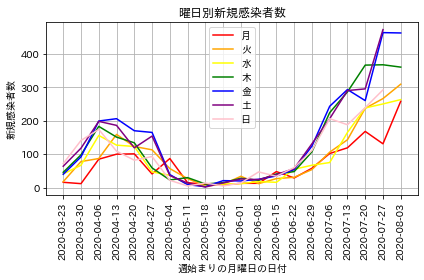

In [14]:
# グラフ描画
fig, ax = plt.subplots()

ax.set_xlabel('週始まりの月曜日の日付')  # x軸ラベル
ax.set_ylabel('新規感染者数')  # y軸ラベル
ax.set_title('曜日別新規感染者数') # グラフタイトル
# ax.set_aspect('equal') # スケールを揃える
ax.grid()            # 罫線
#ax.set_xlim([-10, 10]) # x方向の描画範囲を指定
#ax.set_ylim([0, 1])    # y方向の描画範囲を指定
ax.plot(t, y1, color=c1, label=l1)
ax.plot(t, y2, color=c2, label=l2)
ax.plot(t, y3, color=c3, label=l3)
ax.plot(t, y4, color=c4, label=l4)
ax.plot(t, y5, color=c5, label=l5)
ax.plot(t, y6, color=c6, label=l6)
ax.plot(t, y7, color=c7, label=l7)
ax.legend(loc=0)    # 凡例
plt.xticks(rotation=90)     # x軸の文字を90度回転
fig.tight_layout()  # レイアウトの設定（保存の直前に入れて調整）
plt.savefig('week.png', dpi=300) # 画像の保存
plt.show()